In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
ds = pd.read_csv("E:/dev/ml_course_rv/ml_course_homework/CarPrice_Assignment.csv")

In [3]:
ds.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
ds.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
clean_data = ds[['CarName', 'price', 'fueltype', 'enginetype', 'horsepower', 'enginesize']]
#clean_data= clean_data.loc[(clean_data['Year'] < 2020)]
#clean_data= clean_data.loc[(clean_data['Price'] > 100)]

In [28]:
clean_data.loc[:, 'Car_ID'] =  pd.Categorical(ds['CarName']).codes


In [7]:
print(clean_data["CarName"].nunique(), clean_data["Car_ID"].nunique())


147 147


In [8]:
def get_car_name_by_id(data, car_id):
    return clean_data.loc[data['Car_ID'] == car_id, 'CarName'].unique()
car_id = 2
car_names = get_car_name_by_id(clean_data, car_id)
print(f'Car names for Car_ID {car_id}: {car_names}')

Car names for Car_ID 2: ['alfa-romero giulia']


In [29]:
clean_data.loc[:, 'CarBrand'] = ds['CarName'].str.split().str[0]


In [30]:
clean_data.loc[:, 'Brand_ID'] =  pd.Categorical(clean_data['CarBrand']).codes

In [11]:
print(clean_data["CarBrand"].nunique(), clean_data["Brand_ID"].nunique())

28 28


In [12]:
clean_data.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
clean_data.head()

,CarName,price,fueltype,enginetype,horsepower,enginesize,Car_ID,CarBrand,Brand_ID
0,alfa-romero giulia,13495.0,gas,dohc,111,130,2,alfa-romero,1
1,alfa-romero stelvio,16500.0,gas,dohc,111,130,3,alfa-romero,1
2,alfa-romero Quadrifoglio,16500.0,gas,ohcv,154,152,1,alfa-romero,1
3,audi 100 ls,13950.0,gas,ohc,102,109,4,audi,2
4,audi 100ls,17450.0,gas,ohc,115,136,5,audi,2


In [14]:
clean_data.tail()

,CarName,price,fueltype,enginetype,horsepower,enginesize,Car_ID,CarBrand,Brand_ID
200,volvo 145e (sw),16845.0,gas,ohc,114,141,139,volvo,26
201,volvo 144ea,19045.0,gas,ohc,160,141,138,volvo,26
202,volvo 244dl,21485.0,gas,ohcv,134,173,140,volvo,26
203,volvo 246,22470.0,diesel,ohc,106,145,142,volvo,26
204,volvo 264gl,22625.0,gas,ohc,114,141,143,volvo,26


In [15]:
mean_prices = clean_data.groupby('Brand_ID')['price'].mean().reset_index()
mean_prices

,Brand_ID,price
0,0,5499.000000
1,1,15498.333333
2,2,17859.166714
3,3,26118.750000
4,4,33647.000000
5,5,6007.000000
6,6,7875.444444
7,7,8184.692308
8,8,8916.500000
9,9,34600.000000


In [16]:
def get_car_brand_by_id(data, brand_id):
    return clean_data.loc[data['Brand_ID'] == brand_id, 'CarBrand'].unique()
brand_id = 5
car_brand = get_car_brand_by_id(clean_data, brand_id)
print(f'Car names for Car_ID {brand_id}: {car_brand}')

Car names for Car_ID 5: ['chevrolet']


In [31]:
clean_data.loc[:, 'mean_price_by_brand'] = clean_data.groupby('Brand_ID')['price'].mean()

In [18]:
clean_data.head()

,CarName,price,fueltype,enginetype,horsepower,enginesize,Car_ID,CarBrand,Brand_ID,mean_price_by_brand
0,alfa-romero giulia,13495.0,gas,dohc,111,130,2,alfa-romero,1,5499.000000
1,alfa-romero stelvio,16500.0,gas,dohc,111,130,3,alfa-romero,1,15498.333333
2,alfa-romero Quadrifoglio,16500.0,gas,ohcv,154,152,1,alfa-romero,1,17859.166714
3,audi 100 ls,13950.0,gas,ohc,102,109,4,audi,2,26118.750000
4,audi 100ls,17450.0,gas,ohc,115,136,5,audi,2,33647.000000


In [19]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

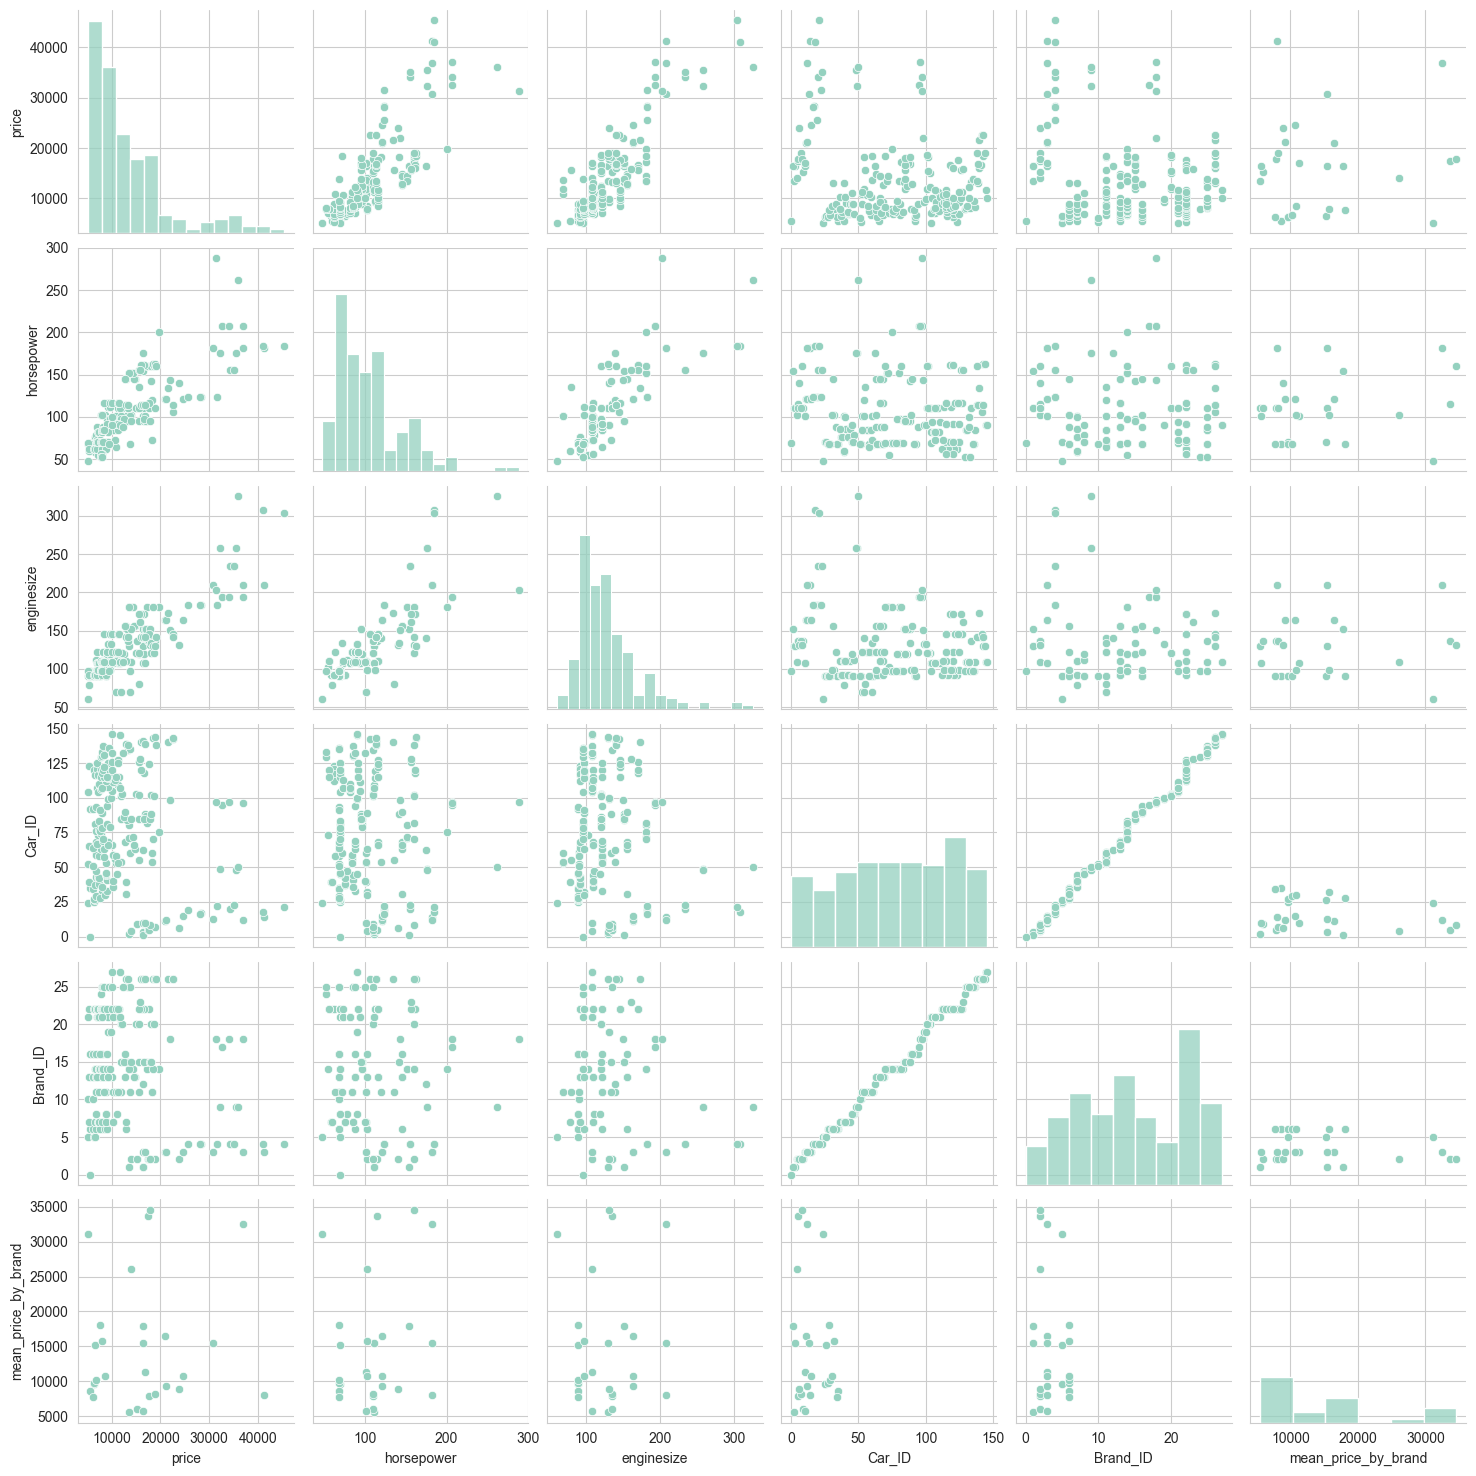

In [20]:
sns.pairplot(clean_data)

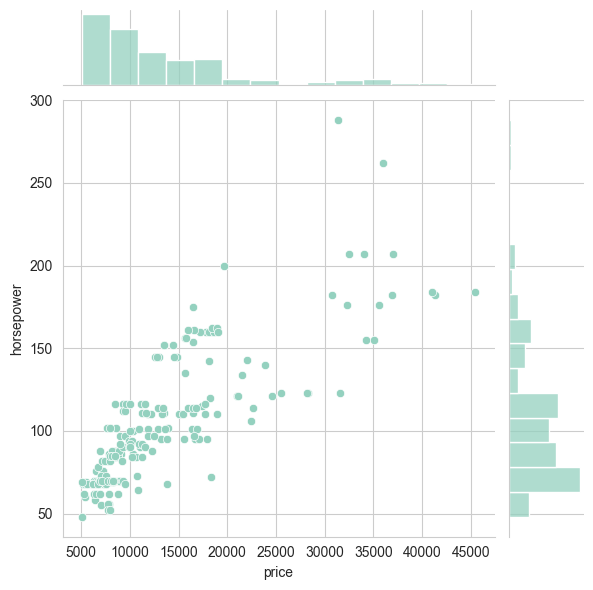

In [21]:
sns.jointplot(x="price", y="horsepower", data=clean_data)

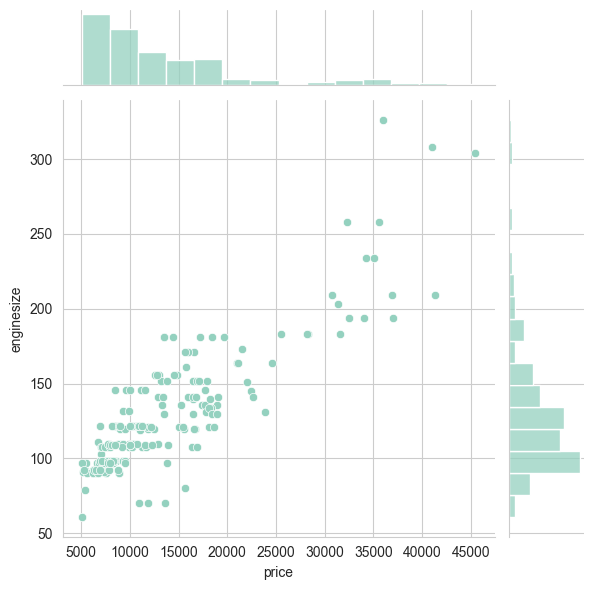

In [22]:
sns.jointplot(x="price", y="enginesize", data=clean_data)

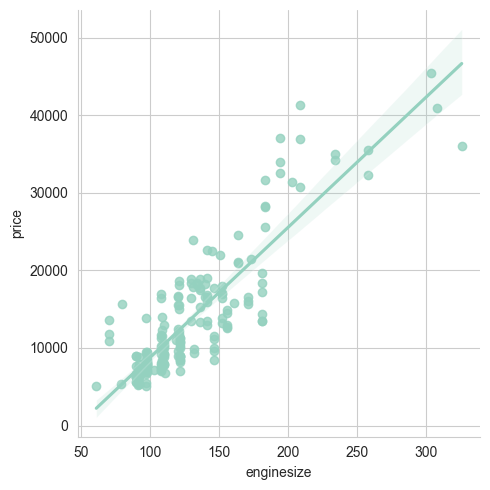

In [23]:
sns.lmplot(x="enginesize", y="price", data=clean_data)

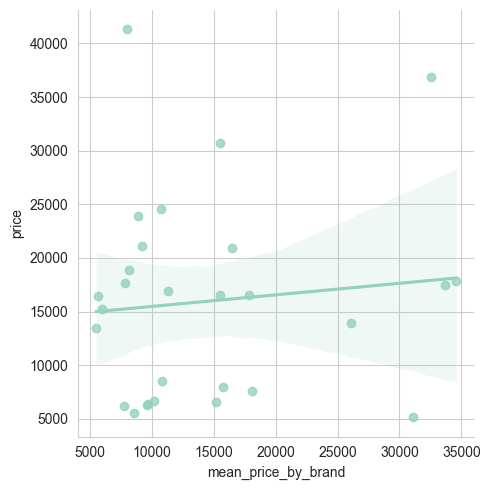

In [24]:
sns.lmplot(x="mean_price_by_brand", y="price", data=clean_data)

In [25]:
clean_data["mean_price_by_brand"].isna().sum()

177

In [26]:
#clean_data = clean_data.dropna(subset=['mean_price_by_brand'])

In [27]:
#clean_data["mean_price_by_brand"].isna().sum()